# **Nama :** Ronal Lumowa 
**Project Submission Dicoding** - *Belajar Machine Learning Untuk Pemula*

In [3]:
# Import library dan fetch dataset
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
# Link dataset dicoding
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-05 07:43:53--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.43MB/s    in 52s     

2021-05-05 07:44:46 (5.94 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
# Ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissorsages/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [5]:
pip install split-folders

In [11]:
# Splitfolder to train and validation
import splitfolders
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', '/tmp/rockpaperscissors/data', seed=1, ratio=(.8, .2))

Copying files: 2188 files [00:00, 4851.51 files/s]


In [12]:
os.listdir('/tmp/rockpaperscissors/data/train')
os.listdir('/tmp/rockpaperscissors/data/val')

['scissors', 'rock', 'paper']

In [13]:
train_rock_dir = os.path.join(train_dir, 'train')
train_scissors_dir = os.path.join(train_dir, 'scissors')
train_paper_dir = os.path.join(train_dir, 'paper')
 
validation_crock_dir = os.path.join(validation_dir, 'rock')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
validation_paper_dir = os.path.join(validation_dir, 'paper')

In [17]:
# Import Data Generator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

## ***Klasifikasi Gambar Dengan Keras***

In [19]:
train_generator = train_datagen.flow_from_directory(
    directory=r"/tmp/rockpaperscissors/data/train/",
    target_size=(150, 150),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 1749 images belonging to 3 classes.


In [25]:
validation_generator = test_datagen.flow_from_directory(
    directory=r"/tmp/rockpaperscissors/data/val/",
    target_size=(150, 150),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 439 images belonging to 3 classes.


In [24]:
from tensorflow import keras

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
# Melihat Module Sequential
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 512)       5

In [27]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=25,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  
      verbose=2)

Epoch 1/25
25/25 - 37s - loss: 1.1147 - accuracy: 0.3473 - val_loss: 1.0336 - val_accuracy: 0.3812
Epoch 2/25
25/25 - 36s - loss: 0.8708 - accuracy: 0.6150 - val_loss: 0.6519 - val_accuracy: 0.7625
Epoch 3/25
25/25 - 35s - loss: 0.4771 - accuracy: 0.8264 - val_loss: 0.4594 - val_accuracy: 0.8313
Epoch 4/25
25/25 - 36s - loss: 0.3302 - accuracy: 0.8834 - val_loss: 0.2010 - val_accuracy: 0.9500
Epoch 5/25
25/25 - 36s - loss: 0.3191 - accuracy: 0.8935 - val_loss: 0.2948 - val_accuracy: 0.8562
Epoch 6/25
25/25 - 36s - loss: 0.1979 - accuracy: 0.9350 - val_loss: 0.2272 - val_accuracy: 0.9250
Epoch 7/25
25/25 - 36s - loss: 0.1478 - accuracy: 0.9463 - val_loss: 0.0746 - val_accuracy: 0.9812
Epoch 8/25
25/25 - 36s - loss: 0.1966 - accuracy: 0.9303 - val_loss: 0.1149 - val_accuracy: 0.9688
Epoch 9/25
25/25 - 37s - loss: 0.1452 - accuracy: 0.9563 - val_loss: 0.1662 - val_accuracy: 0.9563
Epoch 10/25
25/25 - 38s - loss: 0.1440 - accuracy: 0.9438 - val_loss: 0.2147 - val_accuracy: 0.9250
Epoch 11/

Saving WhatsApp Image 2021-05-05 at 06.12.11.jpeg to WhatsApp Image 2021-05-05 at 06.12.11.jpeg
WhatsApp Image 2021-05-05 at 06.12.11.jpeg
rock


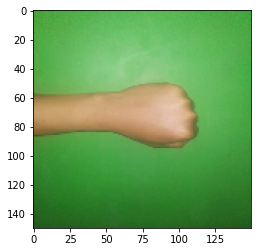

In [28]:

# Imoport Library & Upload
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')